<a href="https://colab.research.google.com/github/dollieeee/projects/blob/main/Elite_tech_intern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BOSTON HOUSE PRICE PREDICTION**

In [ ]:
#House price prediction using boston dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [ ]:
dataset=pd.read_csv('BostonHousing.csv')
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train[:,:-1]=sc.fit_transform(x_train[:,:-1])
x_test[:,:-1]=sc.transform(x_test[:,:-1])

model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(mean_squared_error(y_test,y_pred))
print(model.score(x_test,y_test))



33.44897999767657
0.5892223849182503


In [ ]:
#linear variation of rm and lstat with mdev
x=pd.DataFrame(dataset['lstat'],columns =['lstat'])
y=dataset.iloc[:,-1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
model1=LinearRegression()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
print(mean_squared_error(y_test,y_pred))
# print(model1.score(x_test,y_test))

46.336305360025925


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)
x_poly=poly_reg.fit_transform(x_train)
regressor_2=LinearRegression()
regressor_2.fit(x_poly,y_train)
y_pred=regressor_2.predict(poly_reg.transform(x_test))
print(mean_squared_error(y_test,y_pred))
print(regressor_2.score(poly_reg.transform(x_test),y_test))



33.99923337326926
0.5824648763385463


# **IMAGE CLASSIFICATION USING SVM**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
from skimage.io import imread
from skimage.transform import resize

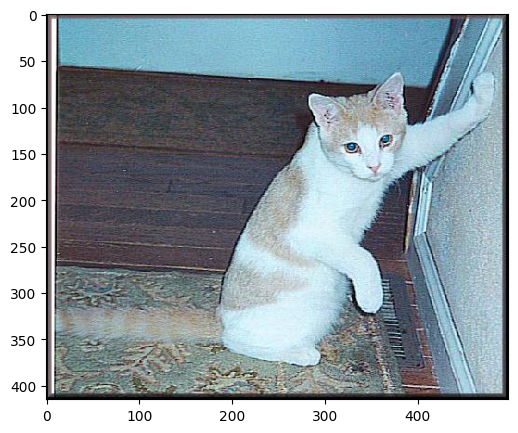

In [ ]:
plt.figure(figsize=(10,5))
img1= "/content/cat.4001.jpg"
plt.imshow(imread(img1))

In [ ]:
img_path="/content/cat.4001.jpg"
img=imread(img_path)
img_resize=resize(img,(150,150))
img_resize.shape
flatten_img=img_resize.flatten()
flatten_img.shape




(67500,)

In [ ]:
import zipfile
import numpy as np
import os
from skimage.io import imread
from skimage.transform import resize

# Unzipping the file
zip_path = r"/content/catdog.zip"  # Path to your uploaded zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/catdog")

BadZipFile: File is not a zip file

In [ ]:

from skimage.io import imread
from skimage.transform import resize

input_dir = r"/content/catdog/test_set"  # Path to the unzipped folder
categories = ['cats', 'dogs']
data = []
labels = []

# Loop through each category ('cats' and 'dogs')
for category_idx, category in enumerate(categories):
    category_path = os.path.join(input_dir, category)

    # Loop through each file in the category directory
    for file in os.listdir(category_path):
        img_path = os.path.join(category_path, file)
        print(img_path)  # Optional: Print the image path

        # Read and resize the image
        img = imread(img_path)
        img = resize(img, (150, 150))  # Resize the image to 150x150

        # Flatten the image and append it to the data list
        data.append(img.flatten())
        labels.append(category_idx)

print("Data processing completed.")


In [ ]:
data=np.asarray(data)
labels=np.asarray(labels)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=42)
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,data,labels,cv=5)
cross_val_score

# **K-MEANS CLUSTERING**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset=pd.read_csv("/content/Mall_Customers.csv")
x=dataset.iloc[:, 3:5].values


In [ ]:

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method the kink after which the graph changes slowly is the no (5)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:

kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x)

In [ ]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='cluster1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='cluster2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='cluster3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='cyan',label='cluster4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c='magenta',label='cluster5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()